In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
def structure(vari, cha1, cha2):
    print("4mu {0} structure: {1}".format(vari, cha1))
    print("2mu2e {0} structure: {1}".format(vari, cha2))
    
    return vari

In [3]:
samples_2mu2e = [
    '2mu2e_500GeV_5GeV_0p08mm',
    '2mu2e_500GeV_5GeV_0p8mm',
    '2mu2e_500GeV_5GeV_8p0mm',
    '2mu2e_500GeV_5GeV_40p0mm',
    '2mu2e_500GeV_5GeV_80p0mm',
]

samples_4mu = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

In [4]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2_merged")
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v2_merged")

events_2mu2e, events_4mu = {}, {}

for i in tqdm(samples_2mu2e):
    fname = fileset_2mu2e[i][0]
    print(fname)
    events_2mu2e[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().TrigObj
    
for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().TrigObj

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/V2/SIDM_BsTo1DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0.root


In [28]:
test = events_4mu["4mu_500GeV_5GeV_0p08mm"][events_4mu["4mu_500GeV_5GeV_0p08mm"].id == 13]

In [91]:
si = test['pt']

In [92]:
print(si)

[[182, 185, 181, 190, 184, 190], [229, 181, ... 96.7, 137], [170, 164, 33, 156, 161]]


In [94]:
print(sorted(si[0]))

[180.53125, 181.65625, 183.5625, 184.96875, 189.71875, 189.78125]


In [37]:
import heapq

In [39]:
heapq.nlargest(1, si[0])

[189.78125]

In [45]:
[heapq.nlargest(2, si[0])[0]]

[189.78125]

In [80]:
sel = ak.num(si) > 1

In [81]:
si = si[sel]

In [67]:
leading_mu, subleading_mu = {}, {}

for i in tqdm(range(len(si))):
    leading_pt = [heapq.nlargest(2, si[i])[0]]
    subleading_pt = [heapq.nlargest(2, si[i])[1]]
    
    if len(leading_mu) == 0:
        leading_mu['pt'] = leading_pt
        subleading_mu['pt'] = subleading_pt
        
    else:
        leading_mu['pt'] = np.concatenate([leading_mu['pt'], leading_pt])
        subleading_mu['pt'] = np.concatenate([subleading_mu['pt'], subleading_pt])

  0%|          | 0/114128 [00:00<?, ?it/s]

In [97]:
leading_mu, subleading_mu = {}, {}

for i in tqdm(range(10)):
    print(sorted(si[i], reverse=True))

  0%|          | 0/10 [00:00<?, ?it/s]

[189.78125, 189.71875, 184.96875, 183.5625, 181.65625, 180.53125]
[712.75, 231.84375, 229.3125, 180.75, 64.09375, 7.5087890625]
[235.03125, 234.96875, 233.59375, 212.25, 28.66796875, 11.984375]
[188.59375, 188.09375, 73.078125, 35.6953125]
[147.375, 146.09375, 142.1875, 101.71875, 41.84375, 11.3125]
[235.9375, 233.28125, 232.5, 175.71875, 175.15625, 173.6875, 31.19921875, 12.470703125]
[195.03125, 193.6875, 189.6875, 151.8125, 148.65625, 148.34375, 89.0]
[101.890625, 100.765625, 100.515625, 78.4375]
[191.625, 190.4375, 189.53125, 136.8125, 135.09375, 18.11328125]
[162.875, 141.46875, 140.25, 135.8125, 75.390625, 71.0]


In [10]:
print(ak.argmax(si, axis=1, keepdims=True))

[[5], [5], [5], [0], [1], [7], [5], [3], ... [1], [1], [6], [4], [0], [1], [1], [0]]


In [40]:
def data(cha1,cha2):
    jet1, jet2 = (events_4mu[cha1].id == 1), (events_2mu2e[cha2].id ==1)
    ele1, ele2 = (events_4mu[cha1].id == 11), (events_2mu2e[cha2].id ==11)
    mu1, mu2 = (events_4mu[cha1].id == 13), (events_2mu2e[cha2].id ==13)
    ta1, ta2 = (events_4mu[cha1].id == 15), (events_2mu2e[cha2].id ==15)
    
    return events_4mu[cha1][jet1], events_4mu[cha1][ele1], events_4mu[cha1][mu1], events_4mu[cha1][ta1], events_2mu2e[cha2][jet2], events_2mu2e[cha2][ele2], events_2mu2e[cha2][mu2], events_2mu2e[cha2][ta2]

In [59]:
def plotting(v1,v2,v3,v4,v5,v6,v7,v8,i,j,k,r1,r2):
    ax[i][j].hist(ak.flatten(v1), range=(r1,r2), alpha=1, bins=50, histtype='step', linewidth=3, label='TrigObj_Jet')
    ax[i][j].hist(ak.flatten(v2), range=(r1,r2), alpha=1, bins=50, histtype='step', linewidth=3, label='TrigObj_Electron')
    ax[i][j].hist(ak.flatten(v3), range=(r1,r2), alpha=1, bins=50, histtype='step', linewidth=3, label='TrigObj_Muon')
    ax[i][j].hist(ak.flatten(v4), range=(r1,r2), alpha=1, bins=50, histtype='step', linewidth=3, label='TrigObj_Tau')
    
    ax[i][k].hist(ak.flatten(v5), range=(r1,r2), alpha=1, bins=50, histtype='step', linewidth=3, label='TrigObj_Jet')
    ax[i][k].hist(ak.flatten(v6), range=(r1,r2), alpha=1, bins=50, histtype='step', linewidth=3, label='TrigObj_Electron')
    ax[i][k].hist(ak.flatten(v7), range=(r1,r2), alpha=1, bins=50, histtype='step', linewidth=3, label='TrigObj_Muon')
    ax[i][k].hist(ak.flatten(v8), range=(r1,r2), alpha=1, bins=50, histtype='step', linewidth=3, label='TrigObj_Tau')
    
    ax[i][j].set_xlim(r1,r2)
    ax[i][j].set_ylabel('Counts')
    ax[i][j].set_yscale("log")
    ax[i][j].legend(fontsize=20)
    
    ax[i][k].set_xlim(r1,r2)
    ax[i][k].set_ylabel('Counts')
    ax[i][k].set_yscale("log")
    ax[i][k].legend(fontsize=20)

In [75]:
def label(vari):
    ax[0][0].set_xlabel('TrigObj {0}'.format(vari))
    ax[0][1].set_xlabel('TrigObj {0}'.format(vari))
    ax[1][0].set_xlabel('TrigObj {0}'.format(vari))
    ax[1][1].set_xlabel('TrigObj {0}'.format(vari))
    ax[2][0].set_xlabel('TrigObj {0}'.format(vari))
    ax[2][1].set_xlabel('TrigObj {0}'.format(vari))
    ax[3][0].set_xlabel('TrigObj {0}'.format(vari))
    ax[3][1].set_xlabel('TrigObj {0}'.format(vari))
    ax[4][0].set_xlabel('TrigObj {0}'.format(vari))
    ax[4][1].set_xlabel('TrigObj {0}'.format(vari))
    
    ax[0][0].set_title('4mu_500GeV_5GeV_0p08mm',color='r')
    ax[0][1].set_title('2mu2e_500GeV_5GeV_0p08mm',color='b')
    ax[1][0].set_title('4mu_500GeV_5GeV_0p8mm',color='r')
    ax[1][1].set_title('2mu2e_500GeV_5GeV_0p8mm',color='b')
    ax[2][0].set_title('4mu_500GeV_5GeV_8p0mm',color='r')
    ax[2][1].set_title('2mu2e_500GeV_5GeV_8p0mm',color='b')
    ax[3][0].set_title('4mu_500GeV_5GeV_40p0mm',color='r')
    ax[3][1].set_title('2mu2e_500GeV_5GeV_40p0mm',color='b')
    ax[4][0].set_title('4mu_500GeV_5GeV_80p0mm',color='r')
    ax[4][1].set_title('2mu2e_500GeV_5GeV_80p0mm',color='b')

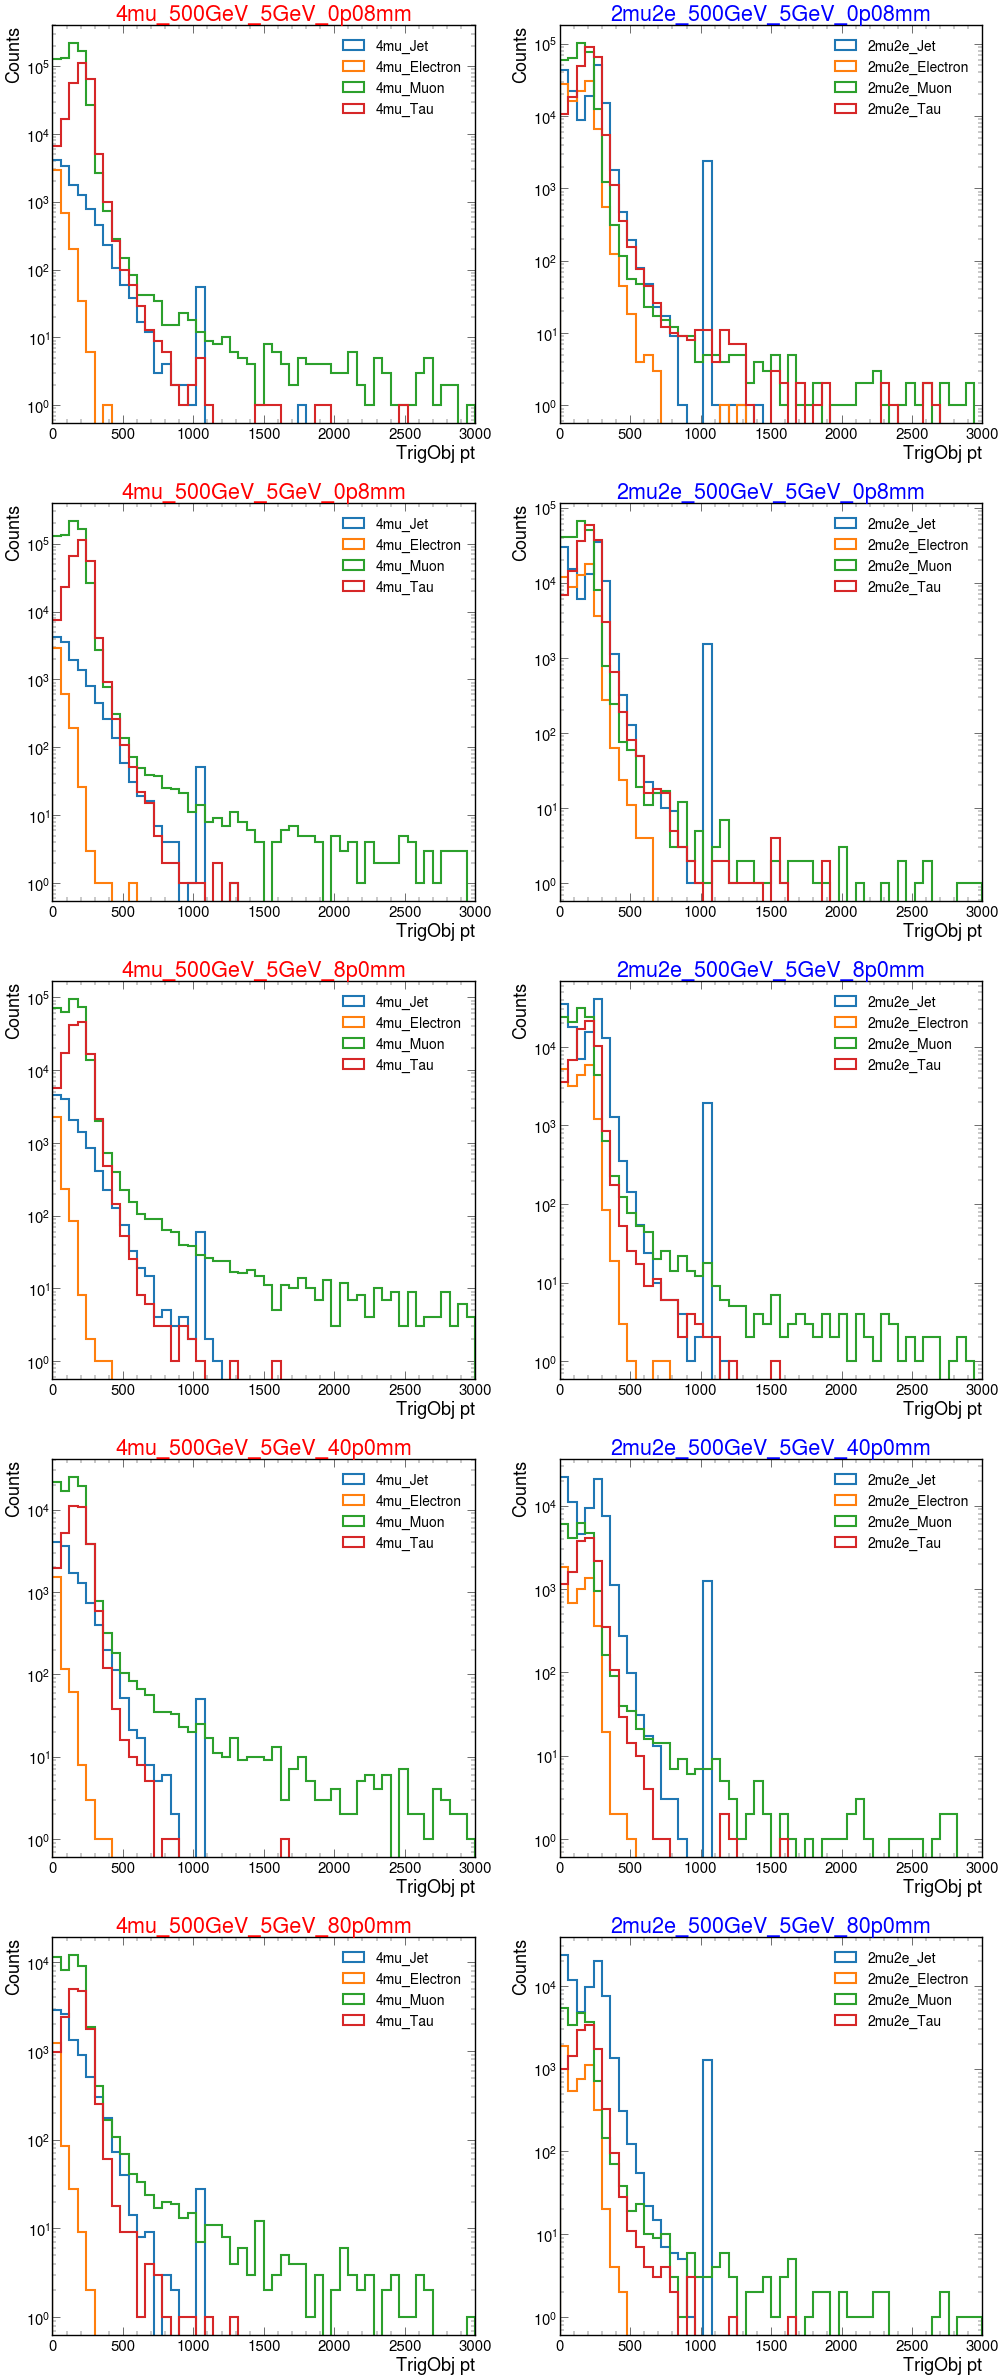

In [80]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(5, 2, figsize=(24,60))

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_0p08mm', '2mu2e_500GeV_5GeV_0p08mm')
plotting(v1.pt,v2.pt,v3.pt,v4.pt,v5.pt,v6.pt,v7.pt,v8.pt,0,0,1,0,3000)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_0p8mm', '2mu2e_500GeV_5GeV_0p8mm')
plotting(v1.pt,v2.pt,v3.pt,v4.pt,v5.pt,v6.pt,v7.pt,v8.pt,1,0,1,0,3000)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_8p0mm', '2mu2e_500GeV_5GeV_8p0mm')
plotting(v1.pt,v2.pt,v3.pt,v4.pt,v5.pt,v6.pt,v7.pt,v8.pt,2,0,1,0,3000)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_40p0mm', '2mu2e_500GeV_5GeV_40p0mm')
plotting(v1.pt,v2.pt,v3.pt,v4.pt,v5.pt,v6.pt,v7.pt,v8.pt,3,0,1,0,3000)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_80p0mm', '2mu2e_500GeV_5GeV_80p0mm')
plotting(v1.pt,v2.pt,v3.pt,v4.pt,v5.pt,v6.pt,v7.pt,v8.pt,4,0,1,0,3000)

label('pt')

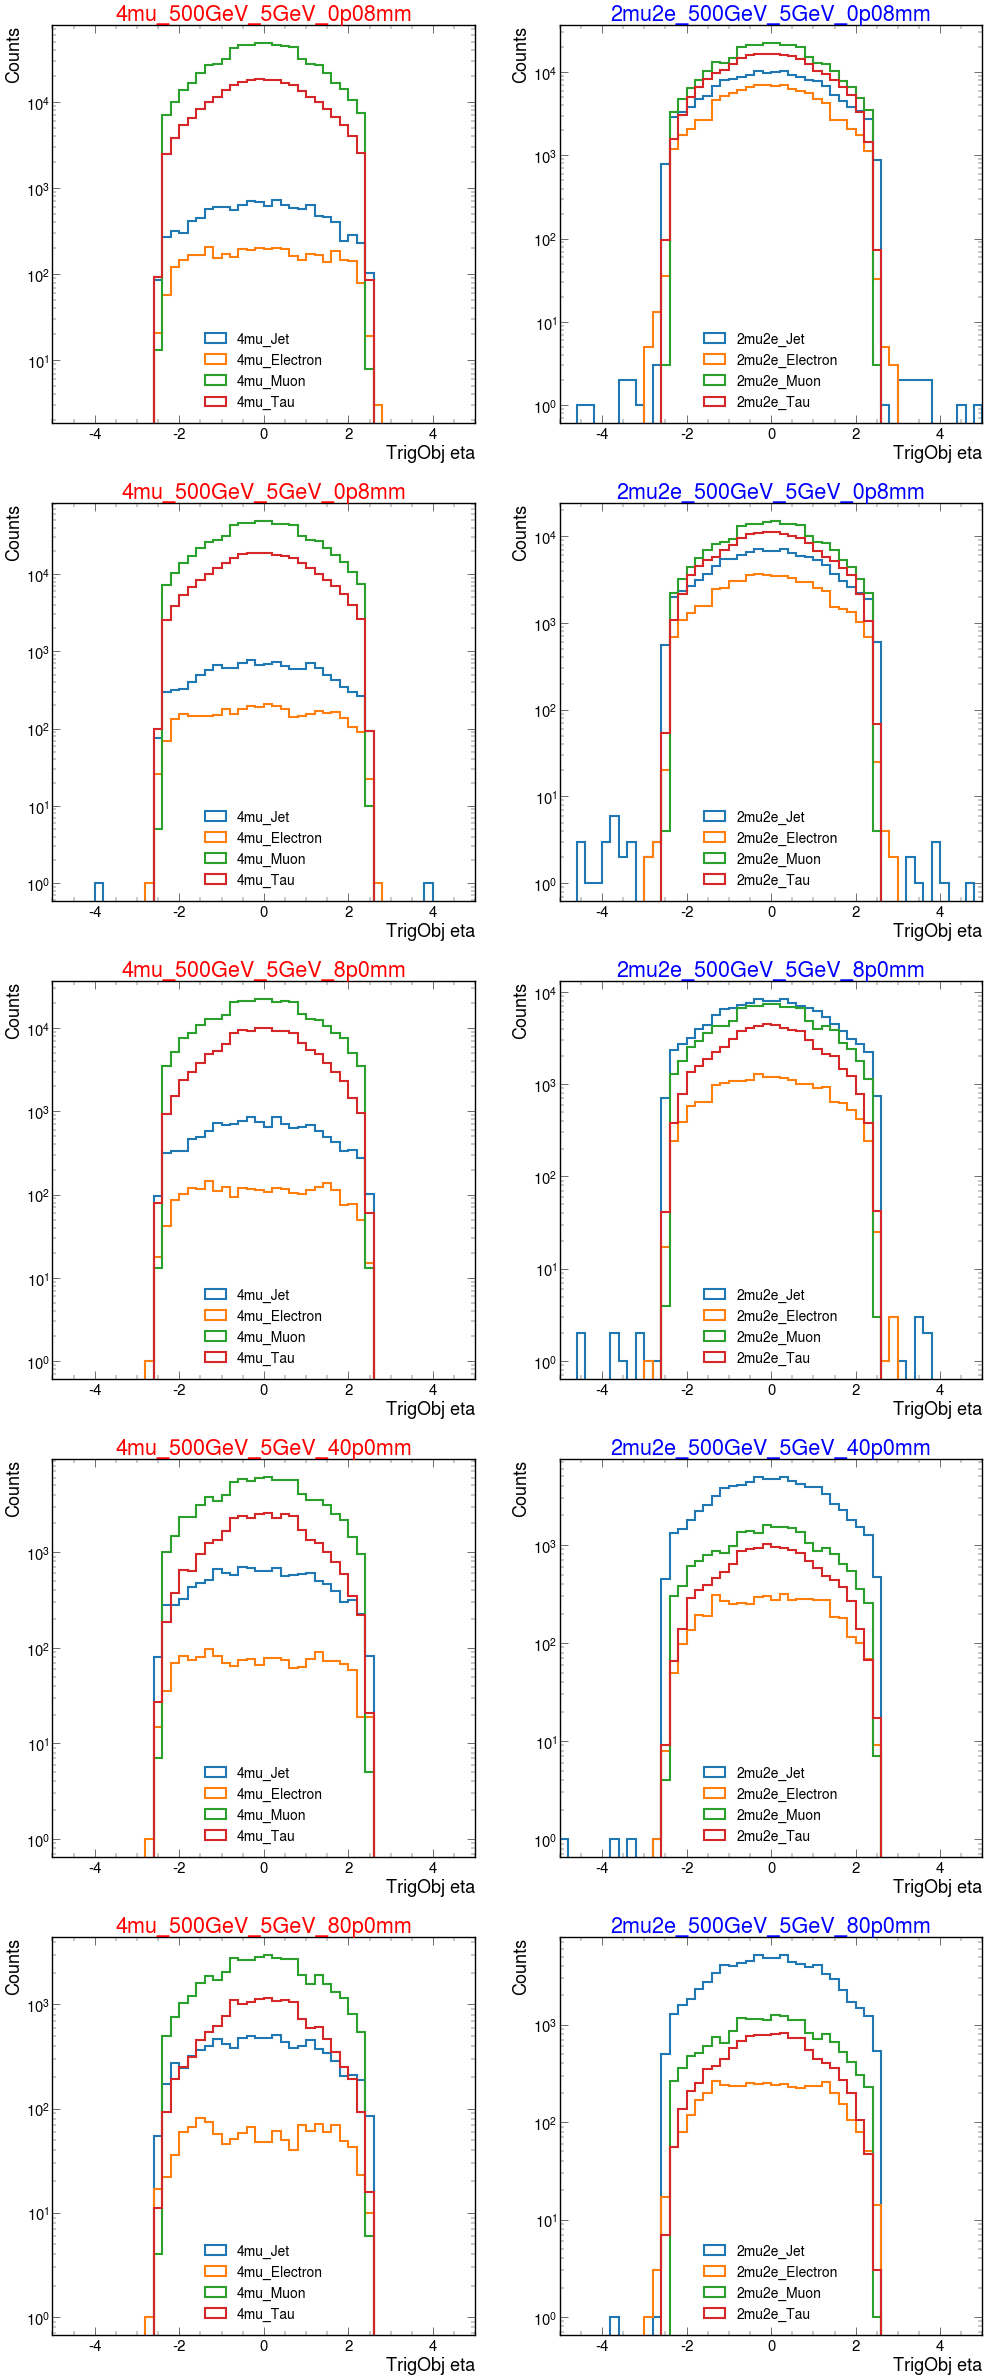

In [79]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(5, 2, figsize=(24,60))

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_0p08mm', '2mu2e_500GeV_5GeV_0p08mm')
plotting(v1.eta,v2.eta,v3.eta,v4.eta,v5.eta,v6.eta,v7.eta,v8.eta,0,0,1,-5,5)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_0p8mm', '2mu2e_500GeV_5GeV_0p8mm')
plotting(v1.eta,v2.eta,v3.eta,v4.eta,v5.eta,v6.eta,v7.eta,v8.eta,1,0,1,-5,5)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_8p0mm', '2mu2e_500GeV_5GeV_8p0mm')
plotting(v1.eta,v2.eta,v3.eta,v4.eta,v5.eta,v6.eta,v7.eta,v8.eta,2,0,1,-5,5)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_40p0mm', '2mu2e_500GeV_5GeV_40p0mm')
plotting(v1.eta,v2.eta,v3.eta,v4.eta,v5.eta,v6.eta,v7.eta,v8.eta,3,0,1,-5,5)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_80p0mm', '2mu2e_500GeV_5GeV_80p0mm')
plotting(v1.eta,v2.eta,v3.eta,v4.eta,v5.eta,v6.eta,v7.eta,v8.eta,4,0,1,-5,5)

label('eta')

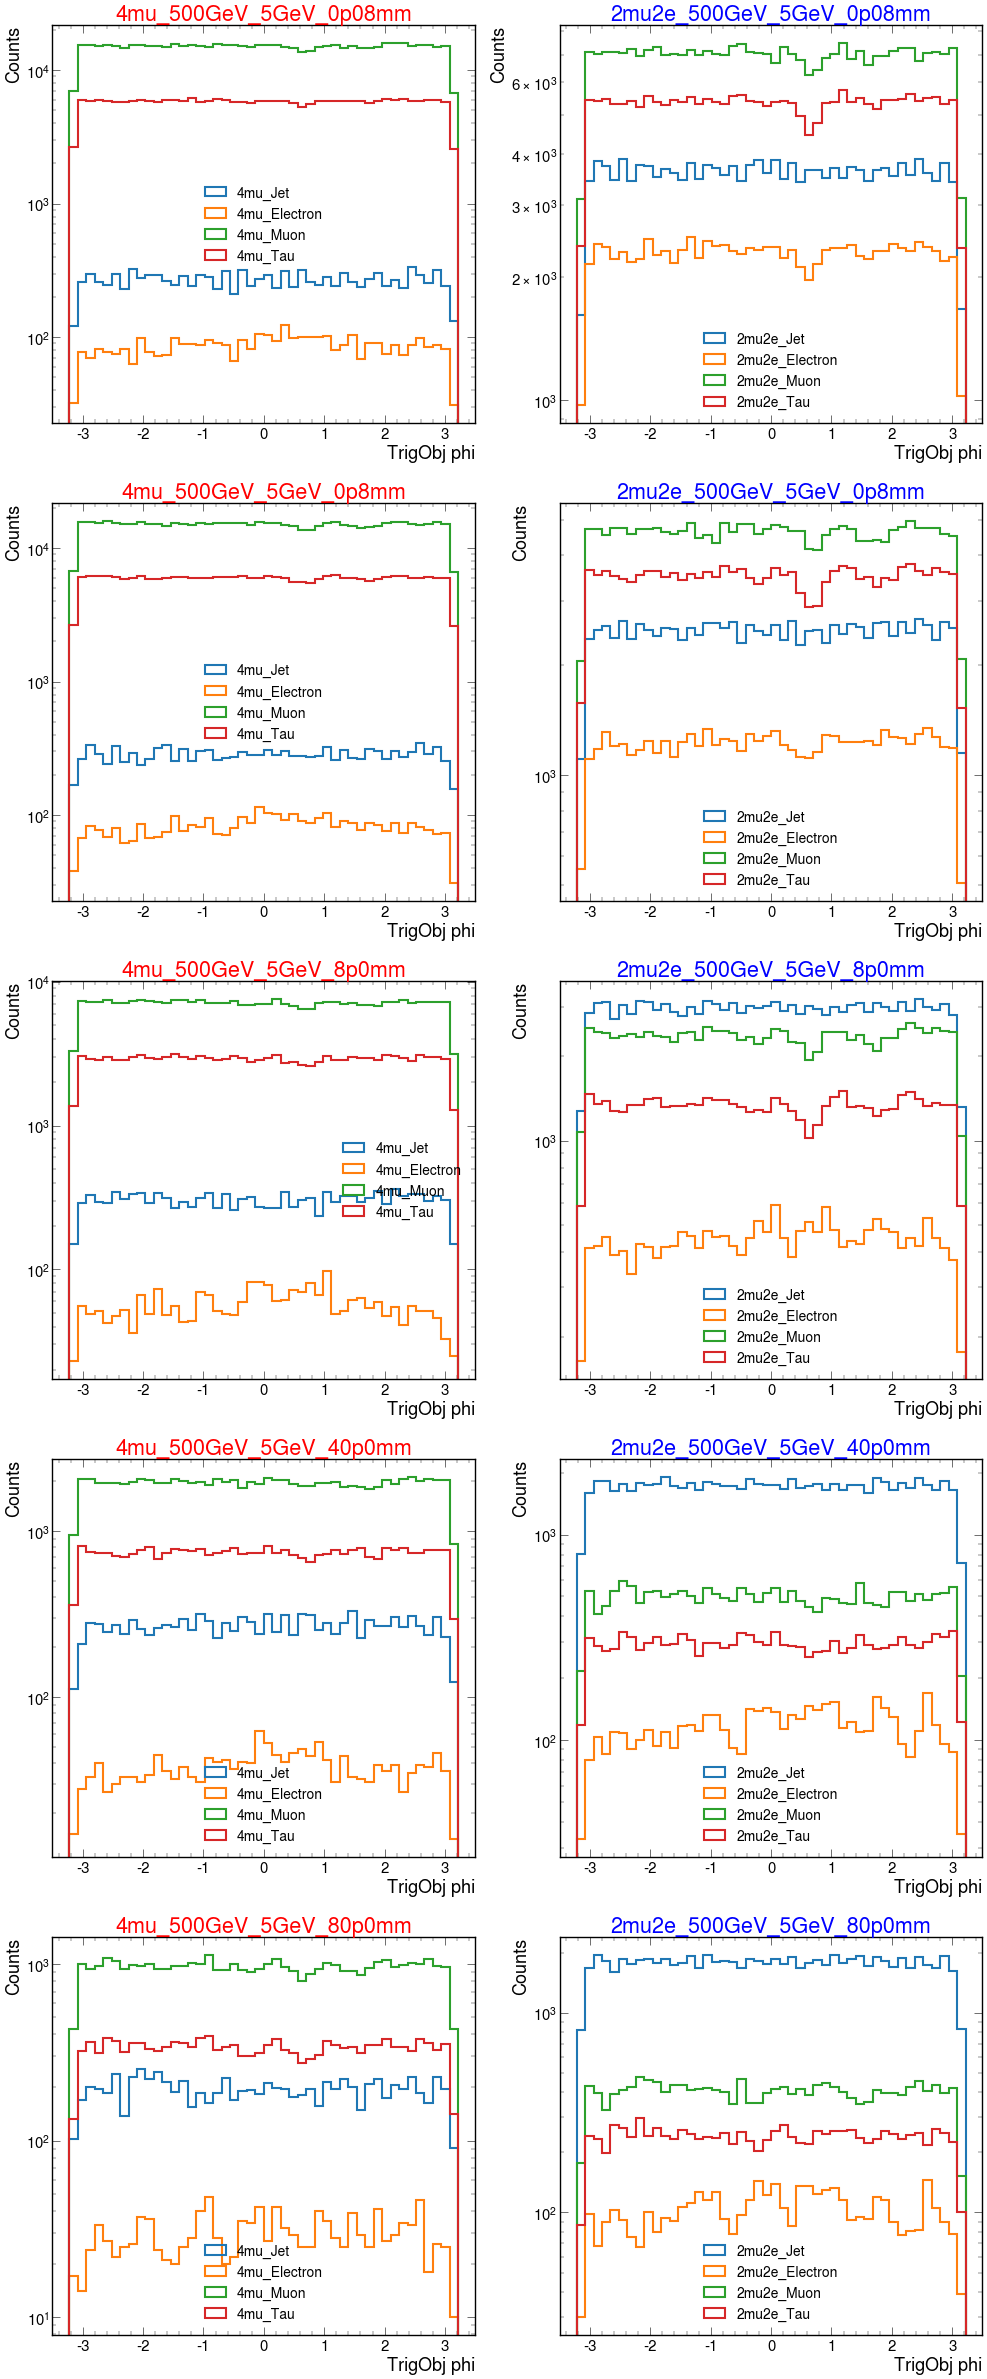

In [81]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(5, 2, figsize=(24,60))

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_0p08mm', '2mu2e_500GeV_5GeV_0p08mm')
plotting(v1.phi,v2.phi,v3.phi,v4.phi,v5.phi,v6.phi,v7.phi,v8.phi,0,0,1,-3.5,3.5)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_0p8mm', '2mu2e_500GeV_5GeV_0p8mm')
plotting(v1.phi,v2.phi,v3.phi,v4.phi,v5.phi,v6.phi,v7.phi,v8.phi,1,0,1,-3.5,3.5)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_8p0mm', '2mu2e_500GeV_5GeV_8p0mm')
plotting(v1.phi,v2.phi,v3.phi,v4.phi,v5.phi,v6.phi,v7.phi,v8.phi,2,0,1,-3.5,3.5)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_40p0mm', '2mu2e_500GeV_5GeV_40p0mm')
plotting(v1.phi,v2.phi,v3.phi,v4.phi,v5.phi,v6.phi,v7.phi,v8.phi,3,0,1,-3.5,3.5)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_80p0mm', '2mu2e_500GeV_5GeV_80p0mm')
plotting(v1.phi,v2.phi,v3.phi,v4.phi,v5.phi,v6.phi,v7.phi,v8.phi,4,0,1,-3.5,3.5)

label('phi')

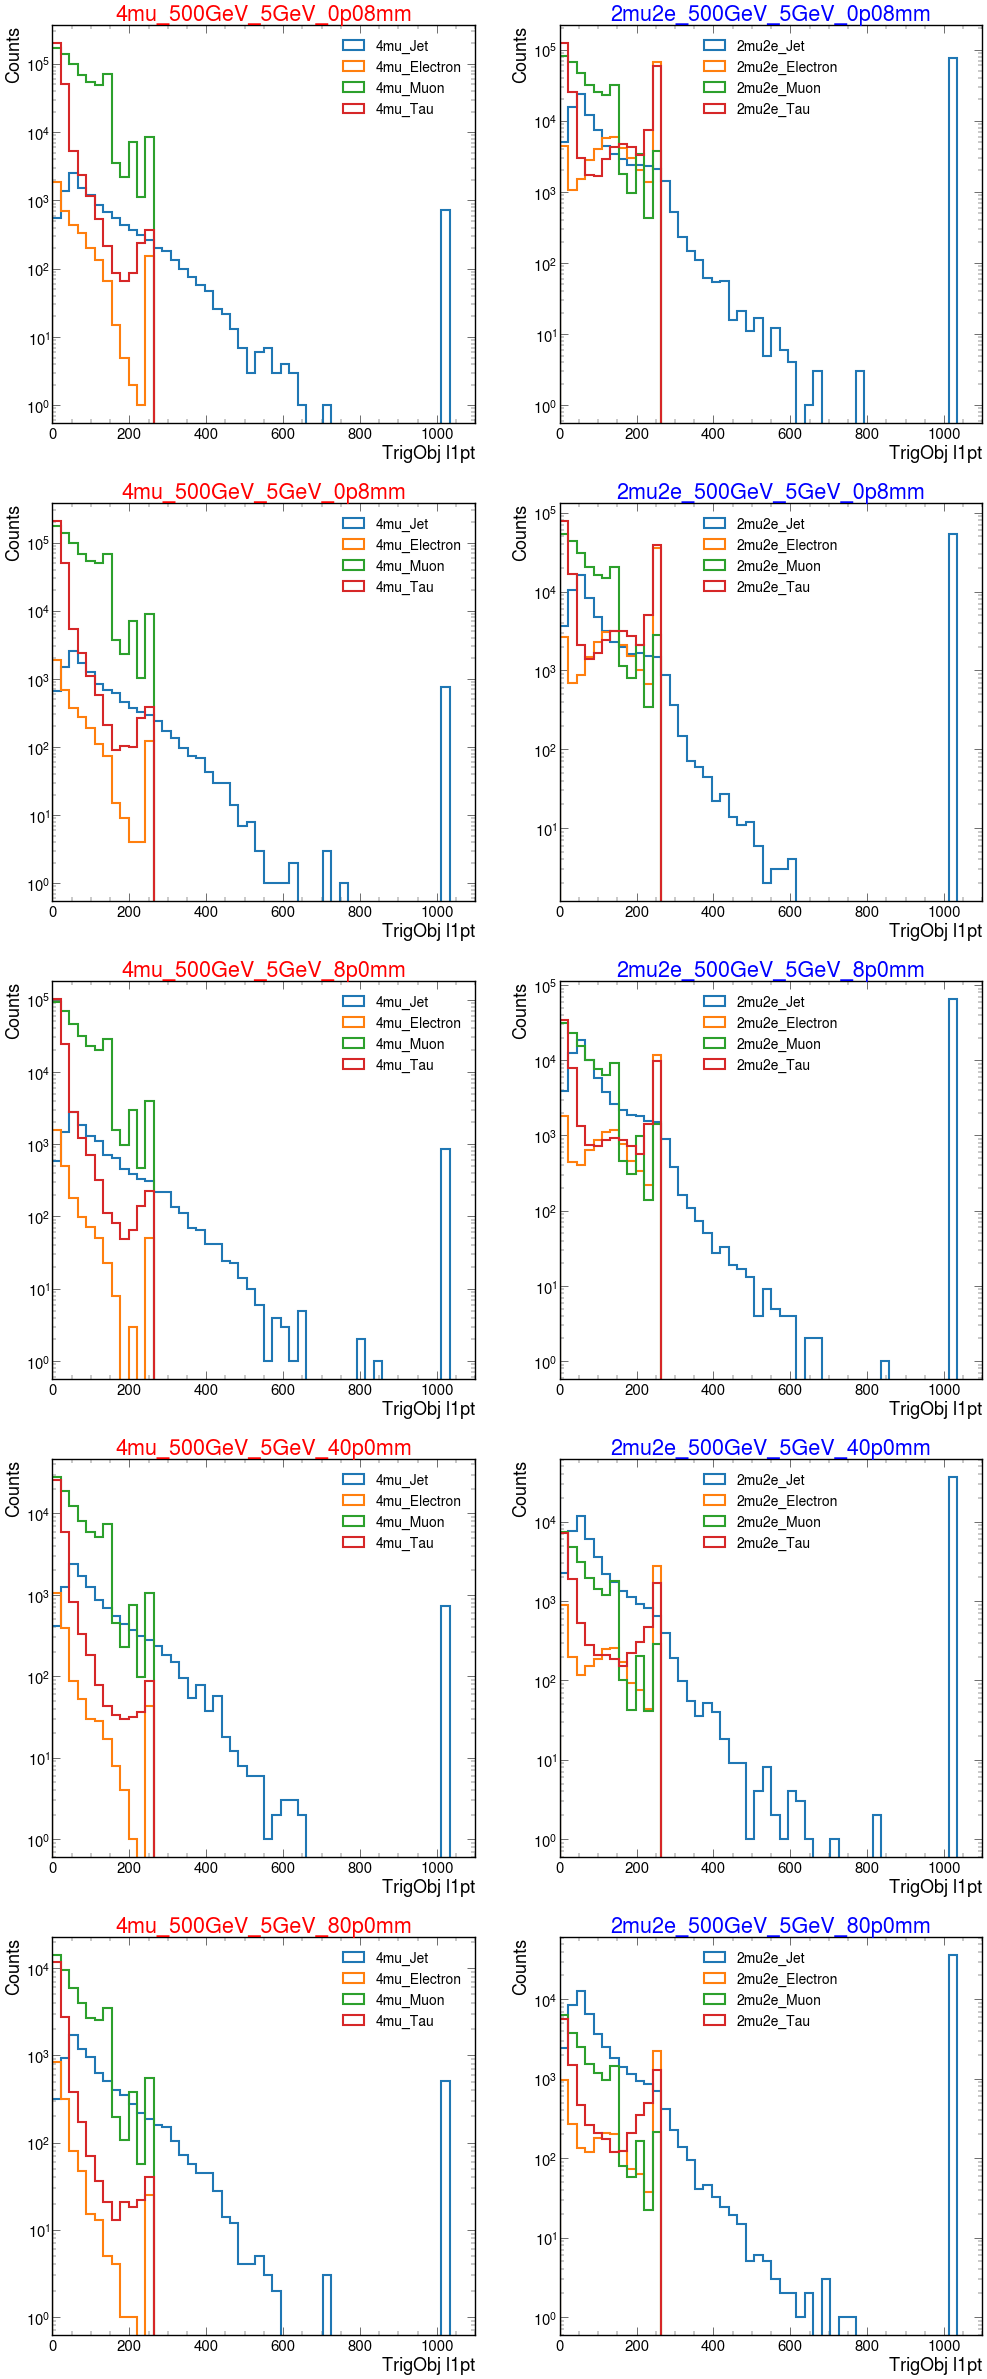

In [84]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(5, 2, figsize=(24,60))

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_0p08mm', '2mu2e_500GeV_5GeV_0p08mm')
plotting(v1.l1pt,v2.l1pt,v3.l1pt,v4.l1pt,v5.l1pt,v6.l1pt,v7.l1pt,v8.l1pt,0,0,1,0,1100)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_0p8mm', '2mu2e_500GeV_5GeV_0p8mm')
plotting(v1.l1pt,v2.l1pt,v3.l1pt,v4.l1pt,v5.l1pt,v6.l1pt,v7.l1pt,v8.l1pt,1,0,1,0,1100)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_8p0mm', '2mu2e_500GeV_5GeV_8p0mm')
plotting(v1.l1pt,v2.l1pt,v3.l1pt,v4.l1pt,v5.l1pt,v6.l1pt,v7.l1pt,v8.l1pt,2,0,1,0,1100)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_40p0mm', '2mu2e_500GeV_5GeV_40p0mm')
plotting(v1.l1pt,v2.l1pt,v3.l1pt,v4.l1pt,v5.l1pt,v6.l1pt,v7.l1pt,v8.l1pt,3,0,1,0,1100)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_80p0mm', '2mu2e_500GeV_5GeV_80p0mm')
plotting(v1.l1pt,v2.l1pt,v3.l1pt,v4.l1pt,v5.l1pt,v6.l1pt,v7.l1pt,v8.l1pt,4,0,1,0,1100)

label('l1pt')

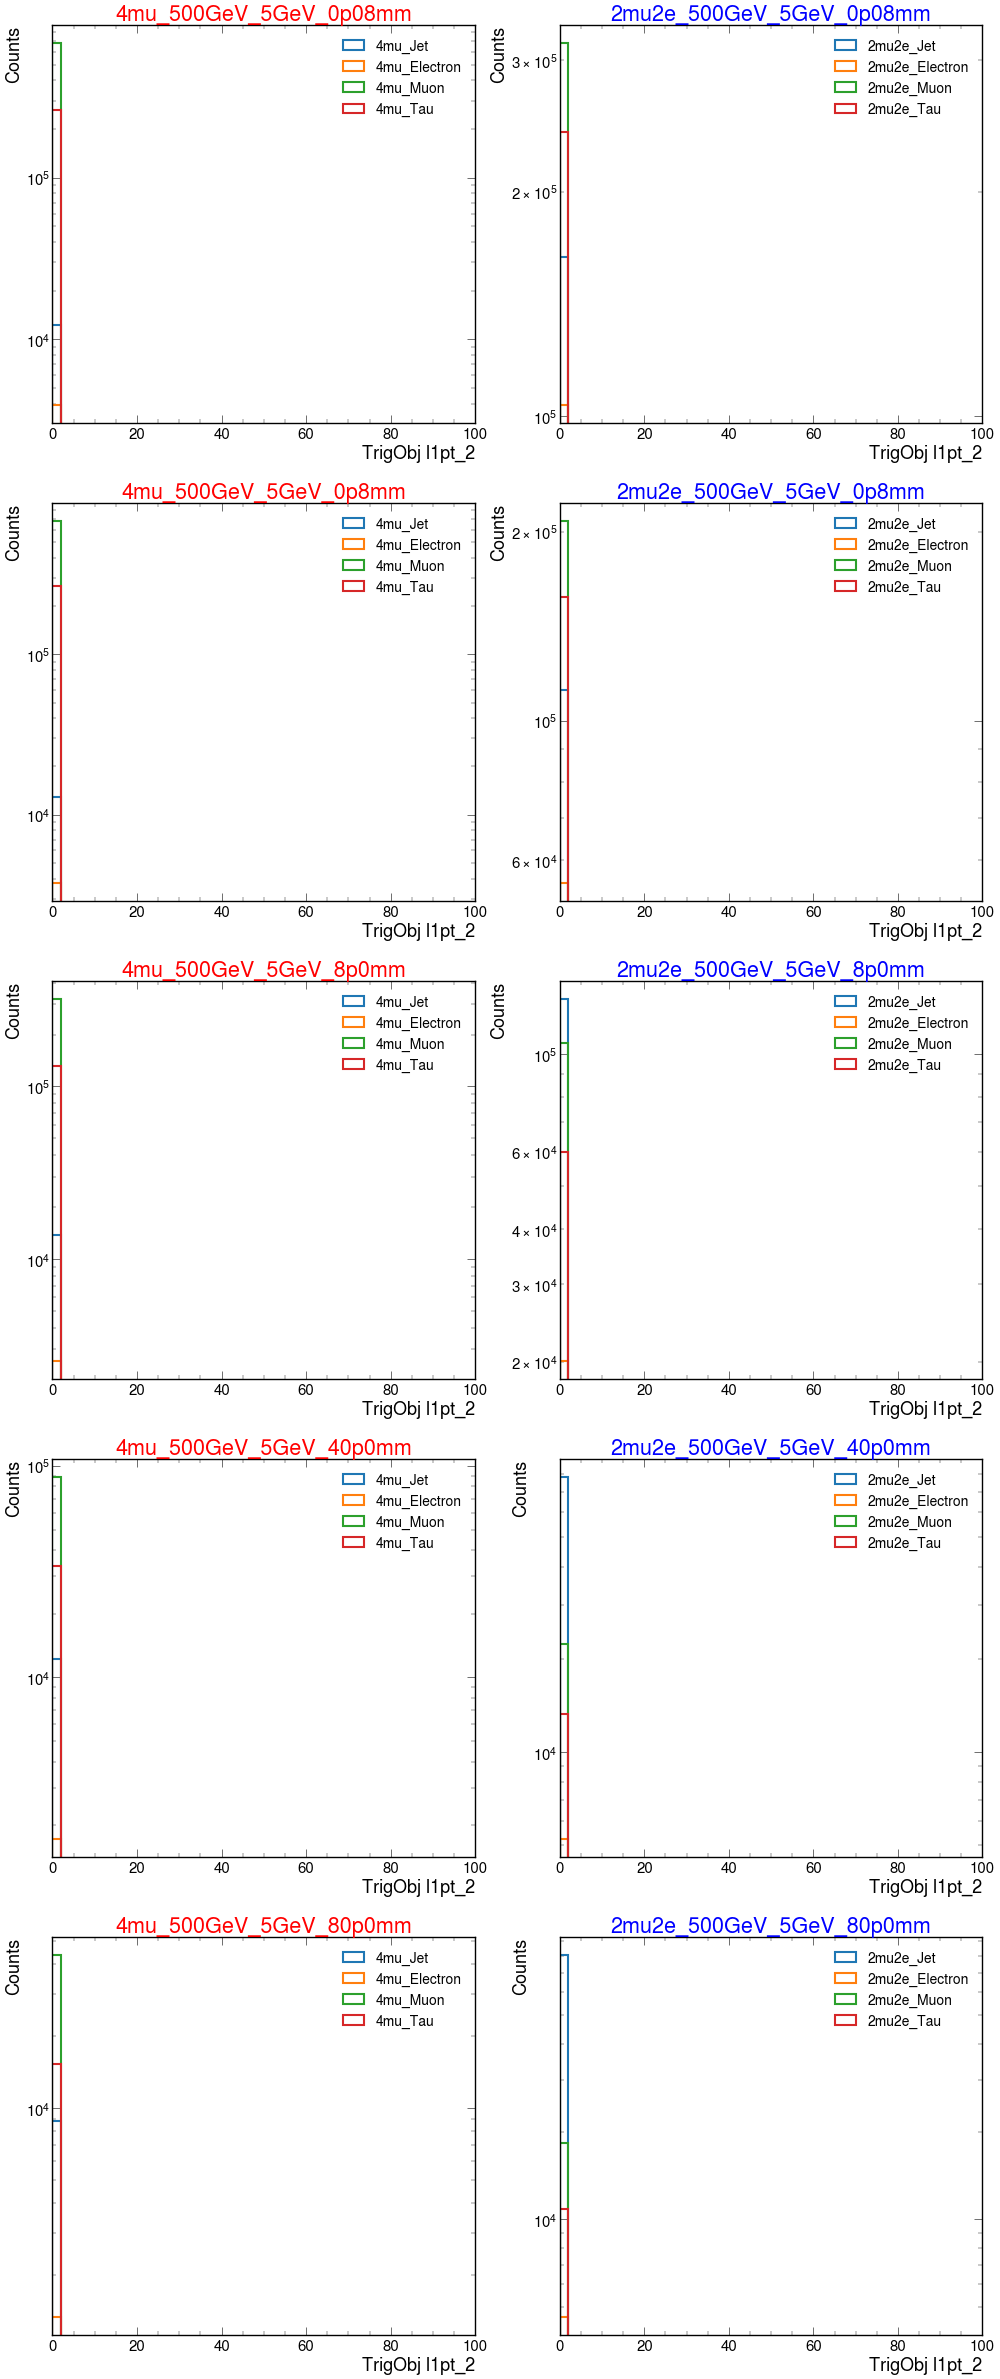

In [86]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(5, 2, figsize=(24,60))

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_0p08mm', '2mu2e_500GeV_5GeV_0p08mm')
plotting(v1.l1pt_2,v2.l1pt_2,v3.l1pt_2,v4.l1pt_2,v5.l1pt_2,v6.l1pt_2,v7.l1pt_2,v8.l1pt_2,0,0,1,0,100)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_0p8mm', '2mu2e_500GeV_5GeV_0p8mm')
plotting(v1.l1pt_2,v2.l1pt_2,v3.l1pt_2,v4.l1pt_2,v5.l1pt_2,v6.l1pt_2,v7.l1pt_2,v8.l1pt_2,1,0,1,0,100)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_8p0mm', '2mu2e_500GeV_5GeV_8p0mm')
plotting(v1.l1pt_2,v2.l1pt_2,v3.l1pt_2,v4.l1pt_2,v5.l1pt_2,v6.l1pt_2,v7.l1pt_2,v8.l1pt_2,2,0,1,0,100)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_40p0mm', '2mu2e_500GeV_5GeV_40p0mm')
plotting(v1.l1pt_2,v2.l1pt_2,v3.l1pt_2,v4.l1pt_2,v5.l1pt_2,v6.l1pt_2,v7.l1pt_2,v8.l1pt_2,3,0,1,0,100)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_80p0mm', '2mu2e_500GeV_5GeV_80p0mm')
plotting(v1.l1pt_2,v2.l1pt_2,v3.l1pt_2,v4.l1pt_2,v5.l1pt_2,v6.l1pt_2,v7.l1pt_2,v8.l1pt_2,4,0,1,0,100)

label('l1pt_2')

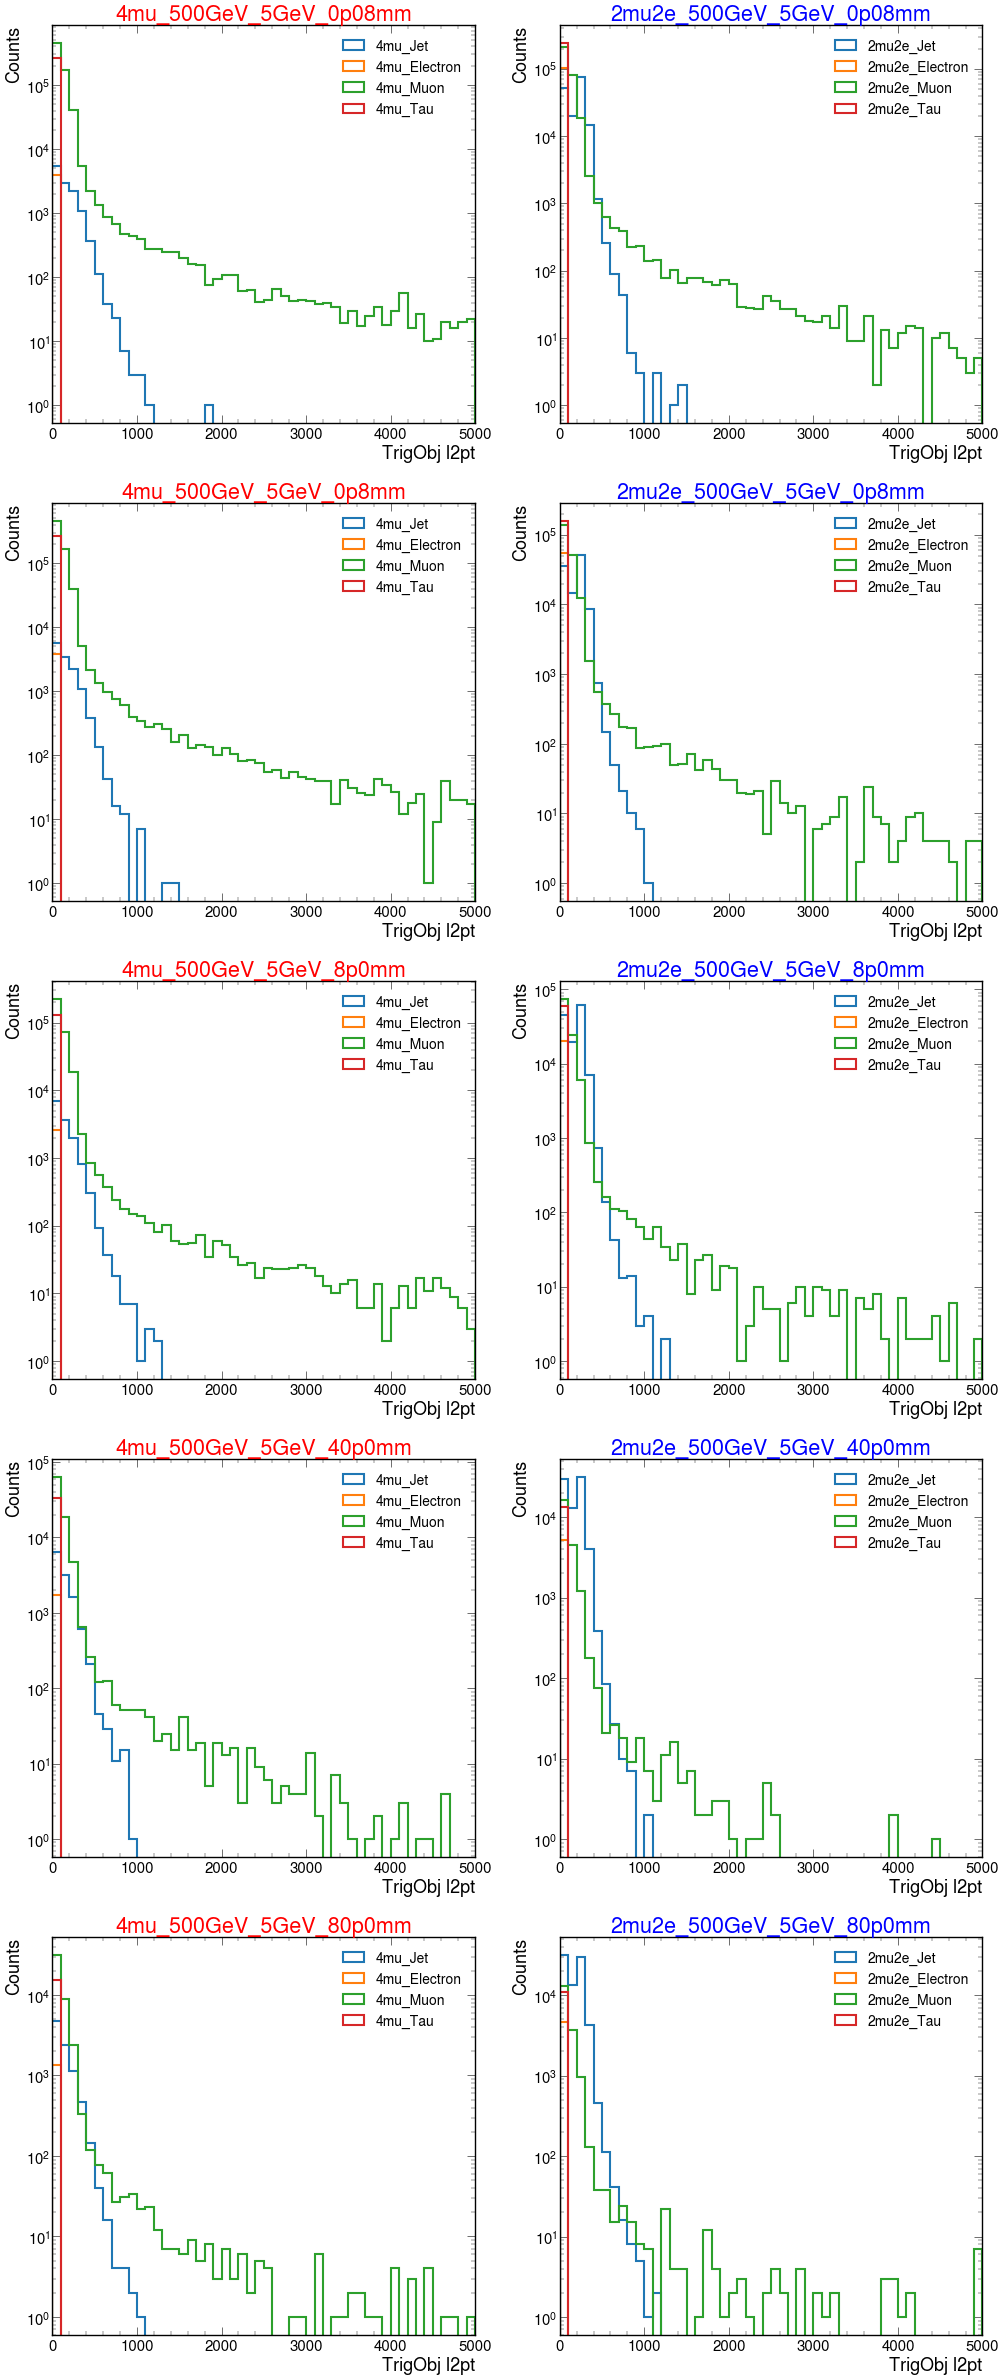

In [87]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(5, 2, figsize=(24,60))

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_0p08mm', '2mu2e_500GeV_5GeV_0p08mm')
plotting(v1.l2pt,v2.l2pt,v3.l2pt,v4.l2pt,v5.l2pt,v6.l2pt,v7.l2pt,v8.l2pt,0,0,1,0,5000)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_0p8mm', '2mu2e_500GeV_5GeV_0p8mm')
plotting(v1.l2pt,v2.l2pt,v3.l2pt,v4.l2pt,v5.l2pt,v6.l2pt,v7.l2pt,v8.l2pt,1,0,1,0,5000)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_8p0mm', '2mu2e_500GeV_5GeV_8p0mm')
plotting(v1.l2pt,v2.l2pt,v3.l2pt,v4.l2pt,v5.l2pt,v6.l2pt,v7.l2pt,v8.l2pt,2,0,1,0,5000)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_40p0mm', '2mu2e_500GeV_5GeV_40p0mm')
plotting(v1.l2pt,v2.l2pt,v3.l2pt,v4.l2pt,v5.l2pt,v6.l2pt,v7.l2pt,v8.l2pt,3,0,1,0,5000)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_80p0mm', '2mu2e_500GeV_5GeV_80p0mm')
plotting(v1.l2pt,v2.l2pt,v3.l2pt,v4.l2pt,v5.l2pt,v6.l2pt,v7.l2pt,v8.l2pt,4,0,1,0,5000)

label('l2pt')

4mu pdgId structure: [[3, 3, 3, 3, 3, 3, 0, 1], [3, 3, 3, 3, 3, ... 3, 3, 1, 1], [3, 3, 3, 3, 3, 1, 1, 1]]
2mu2e pdgId structure: [[3, 1], [3, 3, 3, 3, 0, 0, 0, 1, 1], ... 1, 1], [3, 3, 3, 3, 3, 0, 0, 1, 1, 1]]
4mu pdgId structure: [[3, 3, 3, 3, 3, 1, 1, 1], [3, 3, 3, 3, 3, ... 3, 3, 3, 1, 0], [3, 3, 3, 3, 3, 1, 1]]
2mu2e pdgId structure: [[3, 3, 3, 1, 1, 1, 1], [3, 3, 0, 0, 0, 1, ... 0, 0, 1, 1, 1], [3, 3, 3, 3, 1, 0, 1]]
4mu pdgId structure: [[3, 3, 3, 3, 1, 0, 1], [], [3, 3, 3, 3, 3, ... 3, 3, 3, 3, 3, 0, 1], [3], [3, 3, 0]]
2mu2e pdgId structure: [[3, 3, 0, 0, 0, 0], [0, 0], [3], [0, 0, ... [], [3, 1, 1, 1], [3, 3, 0, 0, 0, 1]]
4mu pdgId structure: [[3, 0], [], [], [], [3, 3, 3], [3, 3, 0, ... [], [], [], [3, 3, 1], [], [0, 3], []]
2mu2e pdgId structure: [[0, 0], [3, 3, 3, 3, 0], [0], [0], [0, ... [], [0, 0], [3, 3, 3, 3, 0, 0], [0, 0]]
4mu pdgId structure: [[], [], [], [], [3, 3, 0], [], [], [3, 3, ... [], [], [], [], [], [], [3], [], []]
2mu2e pdgId structure: [[], [], [0, 0], [0

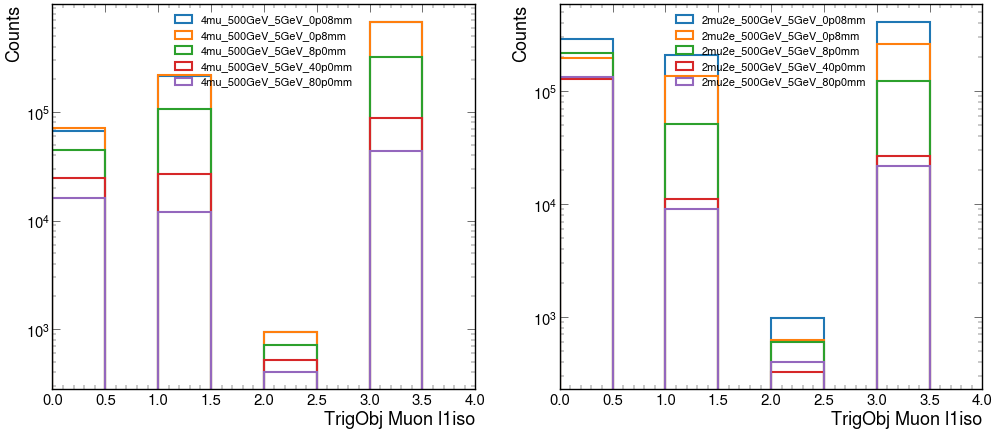

In [27]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("pdgId", events_4mu[i_4mu].l1iso, events_2mu2e[i_2mu].l1iso)
    
    test1 = (events_4mu[i_4mu].id == 13)
    test2 = (events_2mu2e[i_2mu].id == 13)
    
    ax[0].hist(ak.flatten(events_4mu[i_4mu].l1iso), range=(0,4), alpha=1, bins=8, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].l1iso), range=(0,4), alpha=1, bins=8, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,4)
ax[1].set_xlim(0,4)
ax[0].set_xlabel('TrigObj Muon l1iso')
ax[1].set_xlabel('TrigObj Muon l1iso')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)

plt.savefig("../Plots/V2/TrigObj_muon/l1iso.png", bbox_inches="tight")

In [88]:
def plotting(v1,v2,v3,v4,v5,v6,v7,v8,i,j,k,r1,r2):
    ax[i][j].hist(ak.flatten(v1), range=(r1,r2), alpha=1, bins=8, histtype='step', linewidth=3, label='TrigObj_Jet')
    ax[i][j].hist(ak.flatten(v2), range=(r1,r2), alpha=1, bins=8, histtype='step', linewidth=3, label='TrigObj_Electron')
    ax[i][j].hist(ak.flatten(v3), range=(r1,r2), alpha=1, bins=8, histtype='step', linewidth=3, label='TrigObj_Muon')
    ax[i][j].hist(ak.flatten(v4), range=(r1,r2), alpha=1, bins=8, histtype='step', linewidth=3, label='TrigObj_Tau')
    
    ax[i][k].hist(ak.flatten(v5), range=(r1,r2), alpha=1, bins=8, histtype='step', linewidth=3, label='TrigObj_Jet')
    ax[i][k].hist(ak.flatten(v6), range=(r1,r2), alpha=1, bins=8, histtype='step', linewidth=3, label='TrigObj_Electron')
    ax[i][k].hist(ak.flatten(v7), range=(r1,r2), alpha=1, bins=8, histtype='step', linewidth=3, label='TrigObj_Muon')
    ax[i][k].hist(ak.flatten(v8), range=(r1,r2), alpha=1, bins=8, histtype='step', linewidth=3, label='TrigObj_Tau')
    
    ax[i][j].set_xlim(r1,r2)
    ax[i][j].set_ylabel('Counts')
    ax[i][j].set_yscale("log")
    ax[i][j].legend(fontsize=20)
    
    ax[i][k].set_xlim(r1,r2)
    ax[i][k].set_ylabel('Counts')
    ax[i][k].set_yscale("log")
    ax[i][k].legend(fontsize=20)

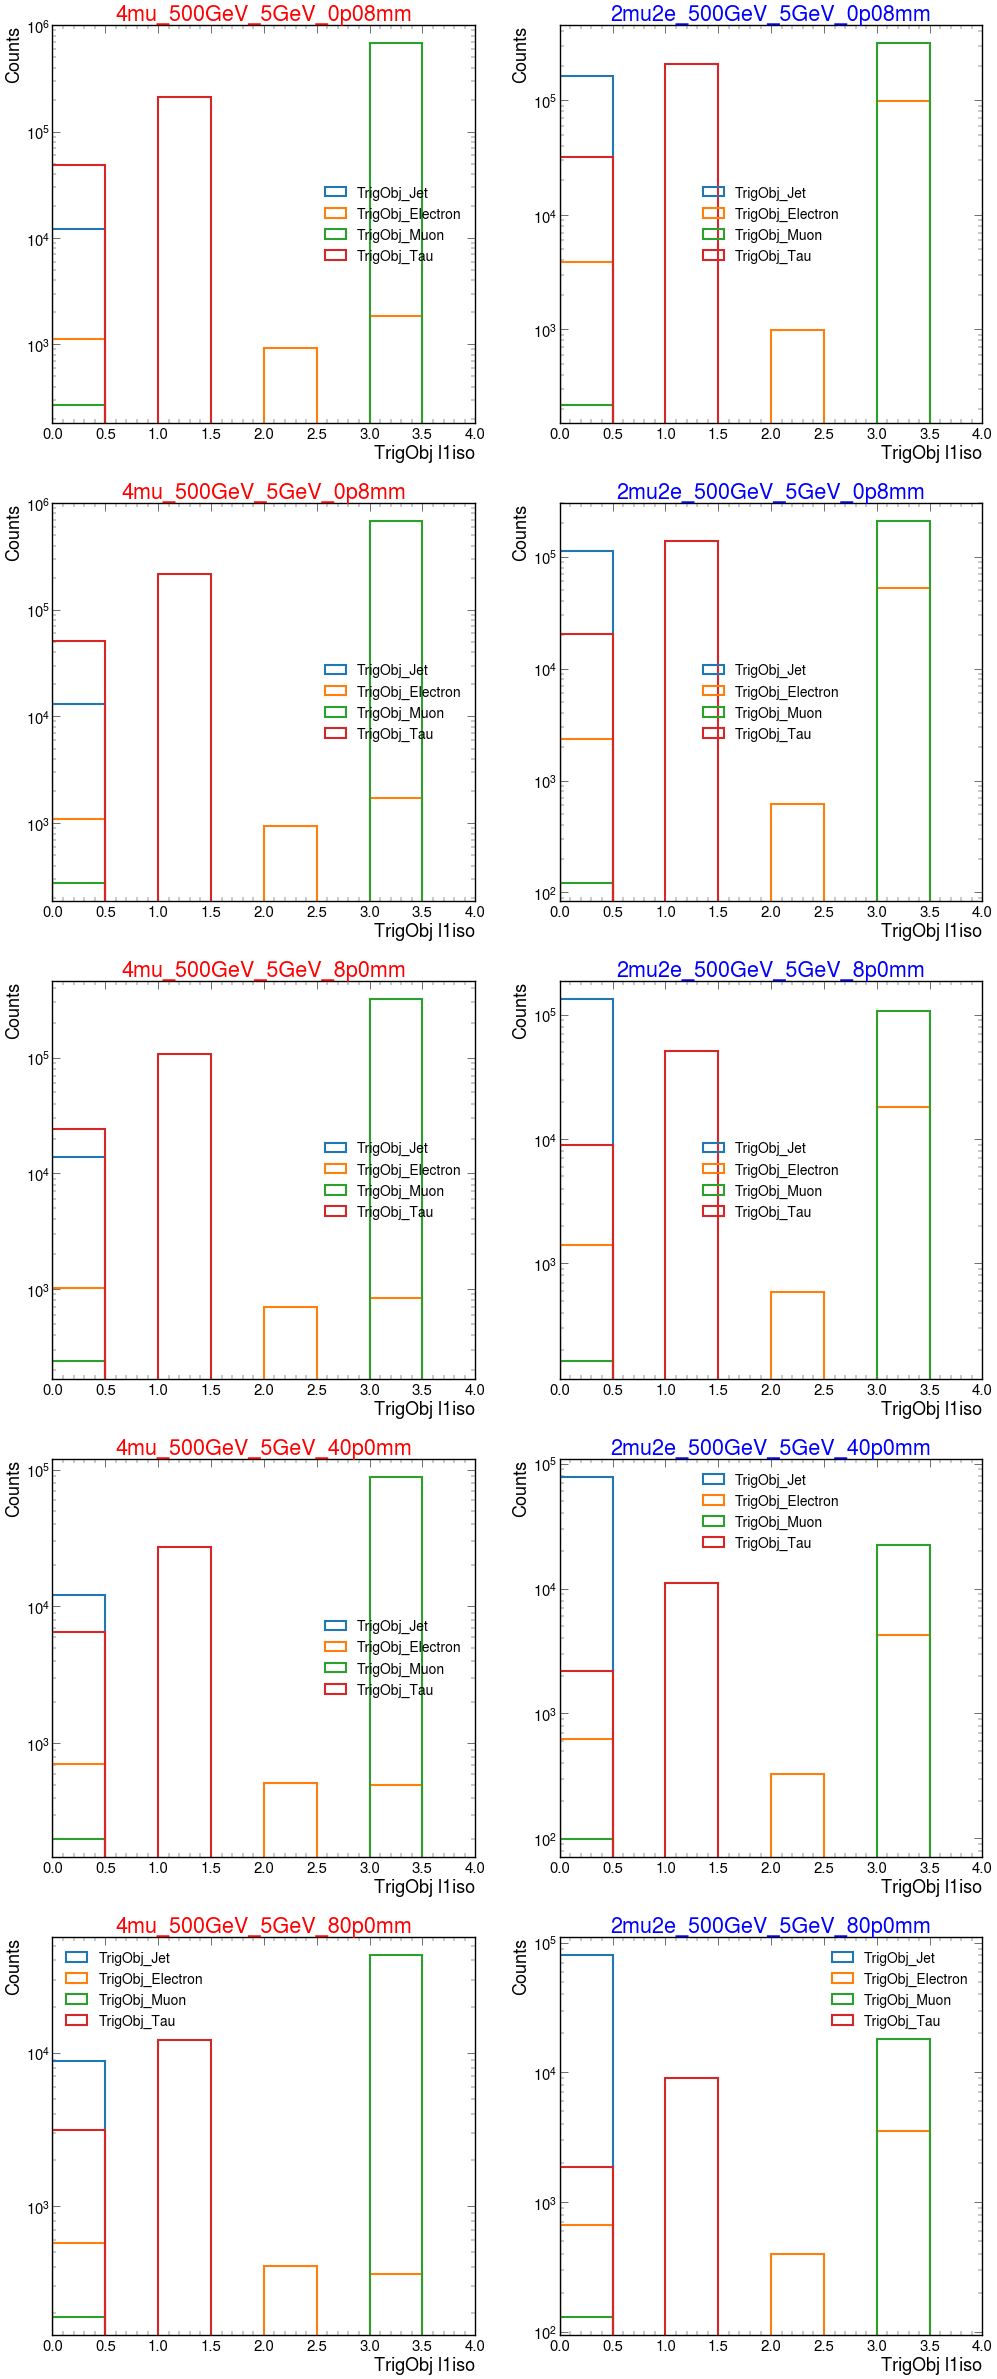

In [89]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(5, 2, figsize=(24,60))

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_0p08mm', '2mu2e_500GeV_5GeV_0p08mm')
plotting(v1.l1iso,v2.l1iso,v3.l1iso,v4.l1iso,v5.l1iso,v6.l1iso,v7.l1iso,v8.l1iso,0,0,1,0,4)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_0p8mm', '2mu2e_500GeV_5GeV_0p8mm')
plotting(v1.l1iso,v2.l1iso,v3.l1iso,v4.l1iso,v5.l1iso,v6.l1iso,v7.l1iso,v8.l1iso,1,0,1,0,4)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_8p0mm', '2mu2e_500GeV_5GeV_8p0mm')
plotting(v1.l1iso,v2.l1iso,v3.l1iso,v4.l1iso,v5.l1iso,v6.l1iso,v7.l1iso,v8.l1iso,2,0,1,0,4)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_40p0mm', '2mu2e_500GeV_5GeV_40p0mm')
plotting(v1.l1iso,v2.l1iso,v3.l1iso,v4.l1iso,v5.l1iso,v6.l1iso,v7.l1iso,v8.l1iso,3,0,1,0,4)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_80p0mm', '2mu2e_500GeV_5GeV_80p0mm')
plotting(v1.l1iso,v2.l1iso,v3.l1iso,v4.l1iso,v5.l1iso,v6.l1iso,v7.l1iso,v8.l1iso,4,0,1,0,4)

label('l1iso')

In [90]:
def plotting(v1,v2,v3,v4,v5,v6,v7,v8,i,j,k,r1,r2):
    ax[i][j].hist(ak.flatten(v1), range=(r1,r2), alpha=1, bins=6, histtype='step', linewidth=3, label='TrigObj_Jet')
    ax[i][j].hist(ak.flatten(v2), range=(r1,r2), alpha=1, bins=6, histtype='step', linewidth=3, label='TrigObj_Electron')
    ax[i][j].hist(ak.flatten(v3), range=(r1,r2), alpha=1, bins=6, histtype='step', linewidth=3, label='TrigObj_Muon')
    ax[i][j].hist(ak.flatten(v4), range=(r1,r2), alpha=1, bins=6, histtype='step', linewidth=3, label='TrigObj_Tau')
    
    ax[i][k].hist(ak.flatten(v5), range=(r1,r2), alpha=1, bins=6, histtype='step', linewidth=3, label='TrigObj_Jet')
    ax[i][k].hist(ak.flatten(v6), range=(r1,r2), alpha=1, bins=6, histtype='step', linewidth=3, label='TrigObj_Electron')
    ax[i][k].hist(ak.flatten(v7), range=(r1,r2), alpha=1, bins=6, histtype='step', linewidth=3, label='TrigObj_Muon')
    ax[i][k].hist(ak.flatten(v8), range=(r1,r2), alpha=1, bins=6, histtype='step', linewidth=3, label='TrigObj_Tau')
    
    ax[i][j].set_xlim(r1,r2)
    ax[i][j].set_ylabel('Counts')
    ax[i][j].set_yscale("log")
    ax[i][j].legend(fontsize=20)
    
    ax[i][k].set_xlim(r1,r2)
    ax[i][k].set_ylabel('Counts')
    ax[i][k].set_yscale("log")
    ax[i][k].legend(fontsize=20)

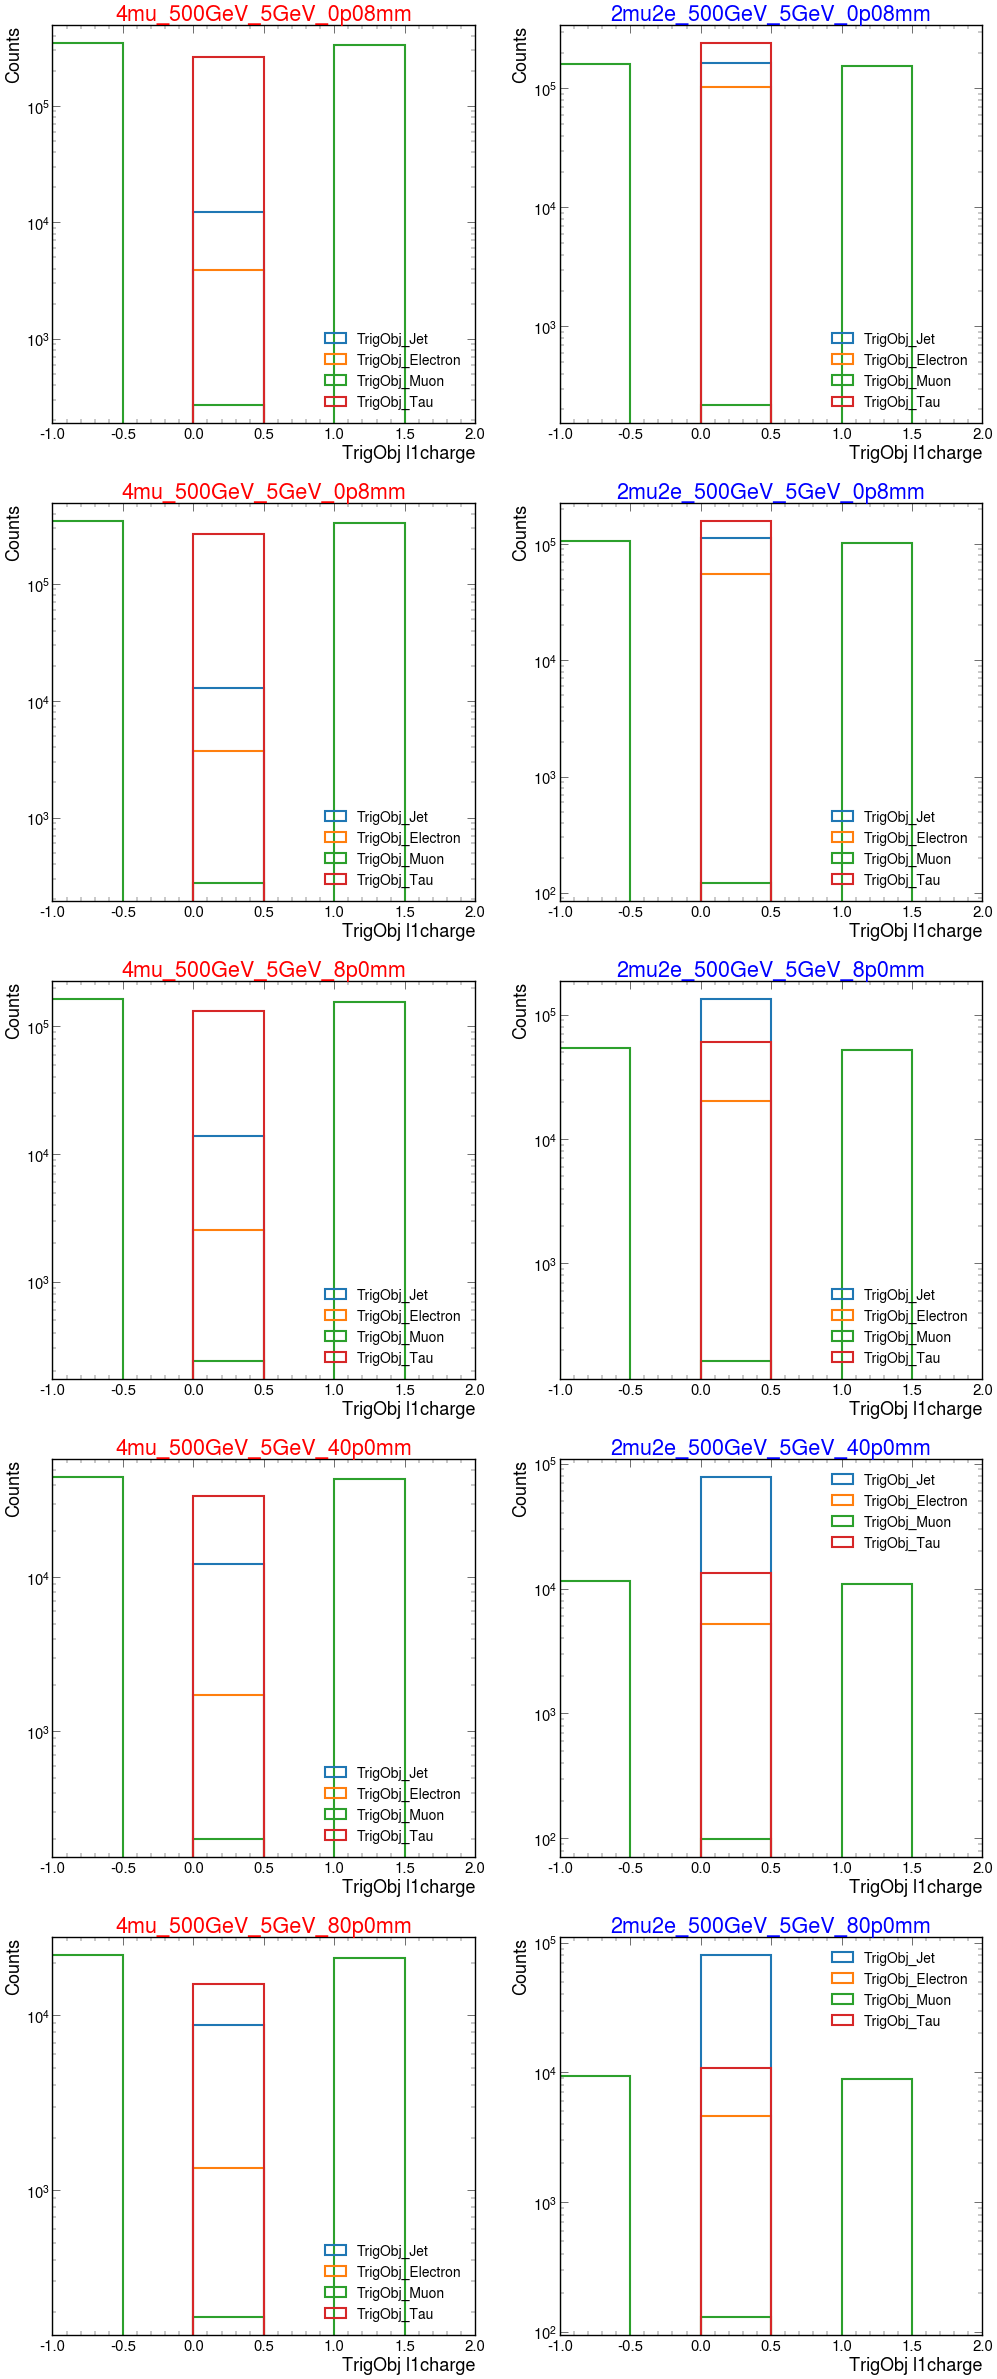

In [91]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(5, 2, figsize=(24,60))

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_0p08mm', '2mu2e_500GeV_5GeV_0p08mm')
plotting(v1.l1charge,v2.l1charge,v3.l1charge,v4.l1charge,v5.l1charge,v6.l1charge,v7.l1charge,v8.l1charge,0,0,1,-1,2)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_0p8mm', '2mu2e_500GeV_5GeV_0p8mm')
plotting(v1.l1charge,v2.l1charge,v3.l1charge,v4.l1charge,v5.l1charge,v6.l1charge,v7.l1charge,v8.l1charge,1,0,1,-1,2)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_8p0mm', '2mu2e_500GeV_5GeV_8p0mm')
plotting(v1.l1charge,v2.l1charge,v3.l1charge,v4.l1charge,v5.l1charge,v6.l1charge,v7.l1charge,v8.l1charge,2,0,1,-1,2)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_40p0mm', '2mu2e_500GeV_5GeV_40p0mm')
plotting(v1.l1charge,v2.l1charge,v3.l1charge,v4.l1charge,v5.l1charge,v6.l1charge,v7.l1charge,v8.l1charge,3,0,1,-1,2)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_80p0mm', '2mu2e_500GeV_5GeV_80p0mm')
plotting(v1.l1charge,v2.l1charge,v3.l1charge,v4.l1charge,v5.l1charge,v6.l1charge,v7.l1charge,v8.l1charge,4,0,1,-1,2)

label('l1charge')